# Сверточные нейронные сети для распознавания образов;
## Множественная классификация с набором данных MNIST

In [32]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Data Research

In [33]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Visualization

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)

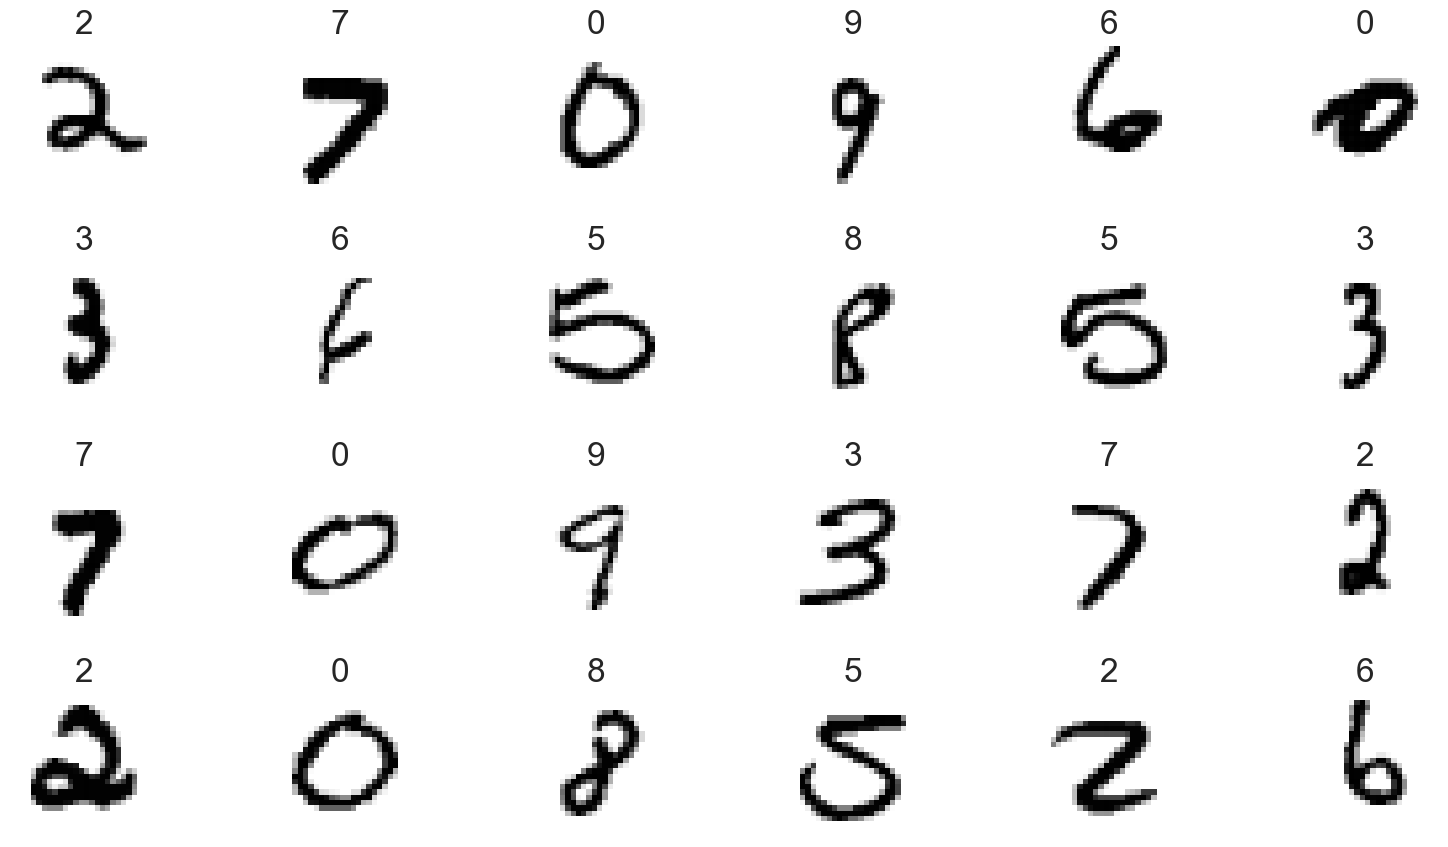

In [35]:
import numpy as np

index = np.random.choice(np.arange(len(X_train)), 24, replace=False)

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))
for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

### Preparing data

In [36]:
X_train = X_train.reshape((60000, 28, 28, 1))

print(X_train.shape)

X_test = X_test.reshape((10000, 28, 28, 1))

print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Normalize data

In [37]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)

print(y_train.shape)

y_test = to_categorical(y_test)

print(y_test.shape)

(60000, 10)
(10000, 10)


### Creating neural network

In [38]:
from tensorflow.keras.models import Sequential

cnn = Sequential()


### Adding levels to network

In [39]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [40]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [41]:
cnn.add(Flatten())

In [42]:
cnn.add(Dense(units=128, activation='relu'))

In [43]:
cnn.add(Dense(units=10, activation='softmax'))

### Output 

In [44]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

### Visualization of structure

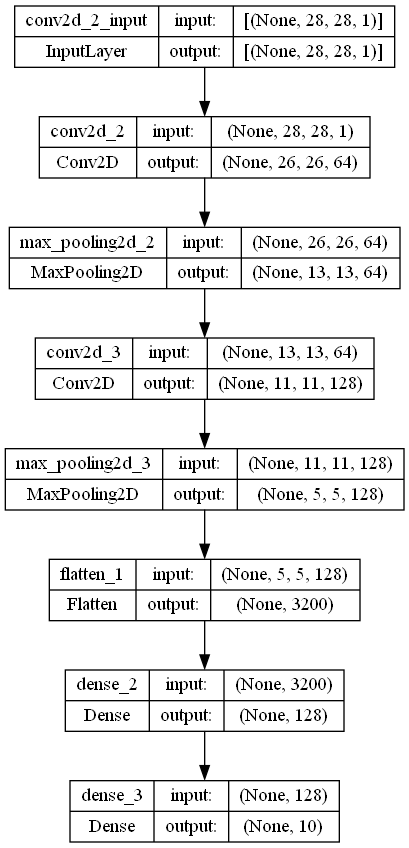

In [45]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(cnn, to_file='images/result.png', show_shapes=True, show_layer_names=True)

Image(filename='images/result.png')

### Compile

In [46]:
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Model training and evaluation

In [47]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 [==============================] - 24s 28ms/step - loss: 0.5395 - accuracy: 0.9465 - val_loss: 0.0678 - val_accuracy: 0.9805
Epoch 2/5
844/844 [==============================] - 23s 27ms/step - loss: 0.0552 - accuracy: 0.9832 - val_loss: 0.0596 - val_accuracy: 0.9827
Epoch 3/5
844/844 [==============================] - 24s 28ms/step - loss: 0.0380 - accuracy: 0.9885 - val_loss: 0.0505 - val_accuracy: 0.9858
Epoch 4/5
844/844 [==============================] - 24s 28ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0552 - val_accuracy: 0.9862
Epoch 5/5
844/844 [==============================] - 24s 28ms/step - loss: 0.0300 - accuracy: 0.9908 - val_loss: 0.0593 - val_accuracy: 0.9847


In [48]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0502 - accuracy: 0.9874


In [49]:
print(loss, accuracy)

0.0502123199403286 0.9873999953269958


### Making predictions

In [50]:
predictions = cnn.predict(X_test)

y_test[0]

313/313 [==============================] - 2s 5ms/step


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [51]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000011%
1: 0.0000000629%
2: 0.0000864448%
3: 0.0001782845%
4: 0.0000000005%
5: 0.0000000044%
6: 0.0000000000%
7: 99.9995708466%
8: 0.0000000049%
9: 0.0001635551%


### Find wrong predictions

In [52]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

len(incorrect_predictions)

126

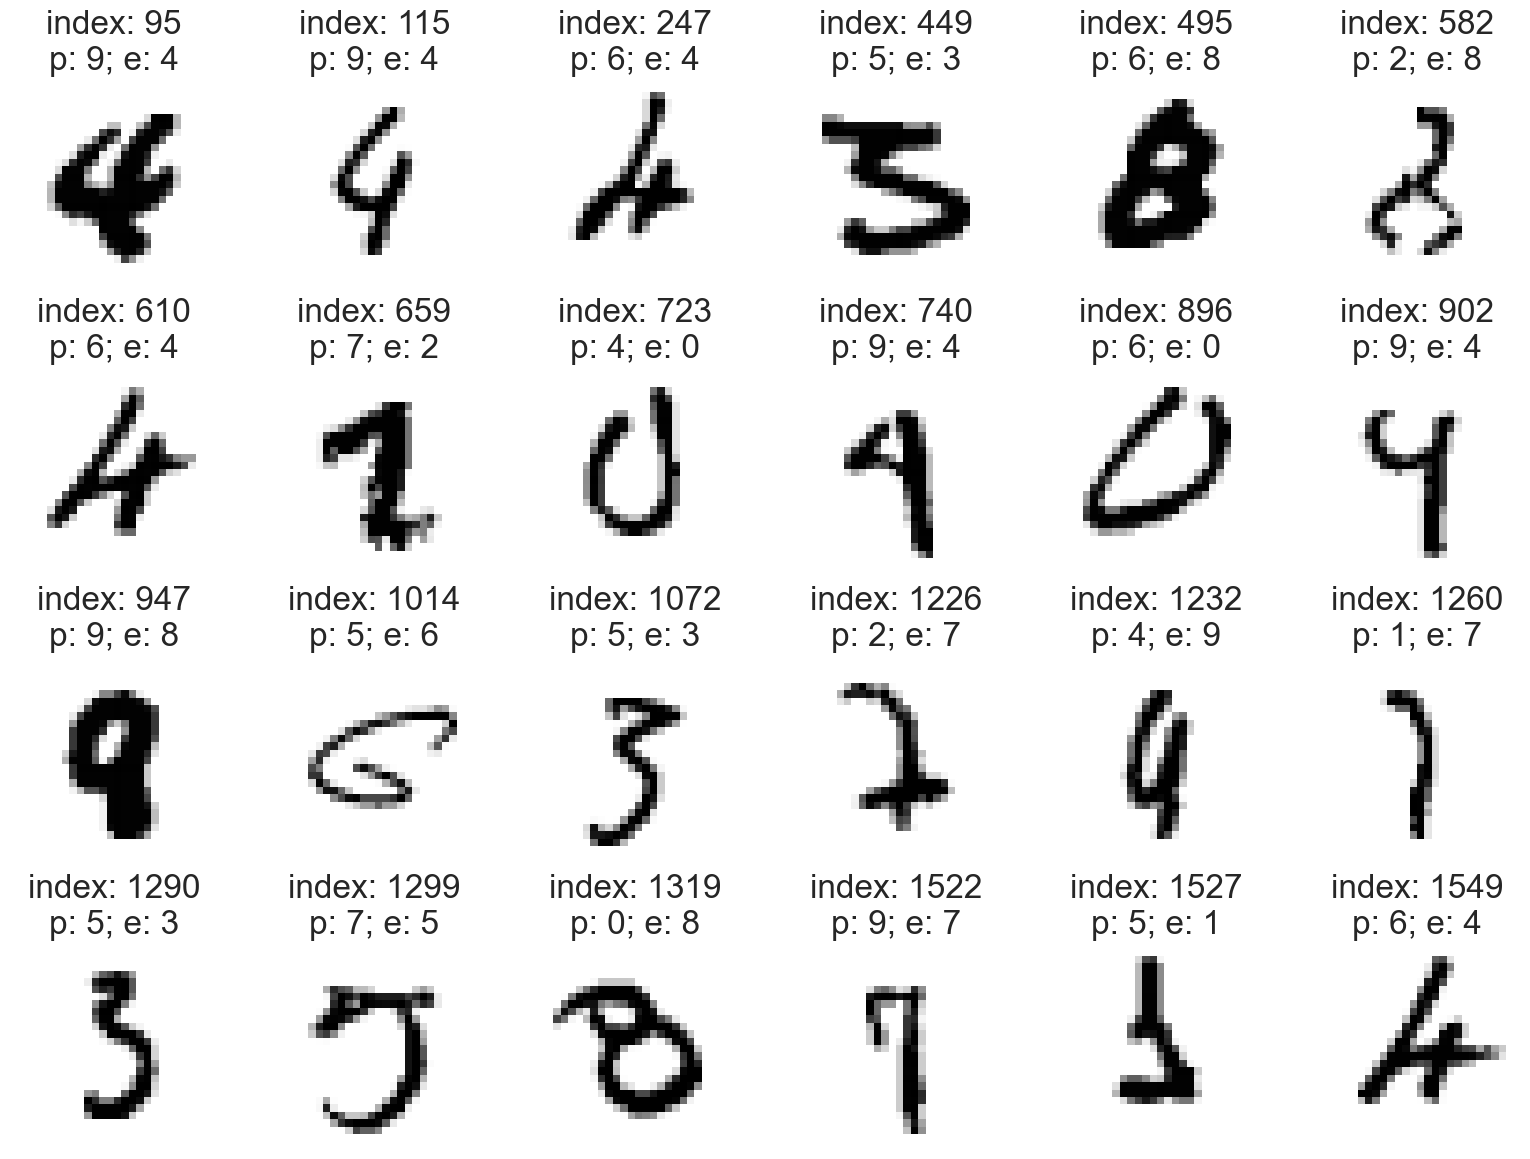

In [53]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')

plt.tight_layout()

### Display prbables for few wrong predictions

In [54]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')
        
display_probabilities(predictions[965])

0: 0.0066753913%
1: 0.0000000053%
2: 0.0000000001%
3: 0.0000018233%
4: 0.0000000620%
5: 0.0001539188%
6: 99.9925136566%
7: 0.0000000019%
8: 0.0006604826%
9: 0.0000000007%


### Save model

In [55]:
cnn.save('models/mnist_cnn.h5')


### Load Model

In [56]:
from tensorflow.keras.models import load_model
cnn = load_model('models/mnist_cnn.h5')